# COMP2200/COMP6200 Assignment 1

Due date: 11:55pm on Sunday April 6th 2025

(Note that daylight savings ends earlier on that day. Remember to move your clock backward by an hour.)

## Scenario

You are working as a data scientist in a venture capital investment firm. You have been given some
data about a potential company to invest in. You will create some models to predict what the 
potential company will be like in 12 months' time.


## About this assignment

This assessment focuses on fundamental statistical analysis, which
will apply linear and logistic regression techniques on one or more
data sets.

The relevant ULO (Unit Learning Outcomes) are:

- Identify the appropriate Data Science analysis for a problem and
  apply that method to the problem.

- Interpret Data Science analyses and summarise and identify the most
  important aspects of a Data Science analysis.

- Present the results of their Data Science analyses both verbally and
  in written form.
  
Total: 15 marks
  

## Submission

Use https://classroom.github.com/a/BdRkY5OH to create a new empty
repository.

Complete this notebook and add it to a new GitHub repository.

Submit this repository via Github Classroom.

Add the video that you create (in the last step) to your GitHub repository.

You don't need to submit your CSV data file, but we won't penalise you
if you do.

## Use of Generative AI

Feel free to use Gen-AI tools (ChatGPT, Anthropic Claude, DeepSeek,
Llama, etc.) to assist you in writing the code. That's what everyone
in industry does nowadays. There are some suggested prompts at the bottom
of this notebook.

Remember that you may be called on to explain what your code does and
how it works, so if you have some code generated for you that you
don't fully understand, spend some time with your Gen-AI tool asking
for clarification until you are confident. Having a personal tutor
guide you is one of the newest and fastest ways to learn to program in
Python, so make the most of the opportunity. 

To help you remember what your code does, you can add comments to your
code either by creating another markdown cell, or by using "#" at the
beginning of a line in a code cell.

Don't use Gen-AI tools for writing reflections and observations. You
will find many cells in this notebook where you need to enter markdown text.
They appear like this:

**Your answer here. Replace the text in this markdown cell. Remember not to use Gen-AI here.**

You don't want to use Gen-AI in these cells for two reasons:

- Thinking and reflecting is how you will get most of the benefit of doing this assignment.

- It will produce meaningless and bland statements (that will be obviously meaningless and bland)
  and you will get bad marks.
  

## Marking Criteria

For a code cell, any working correct answer will earn full marks. For
non-working code, or code that performs a different task, if it seems
like you were on the right track, the marker may issue partial marks.

For code cells that create visualisations, a correct answer is one that
creates a meaningful and useful visualisation of the data.

For a text (markdown) cell, word counts are only a guide: this is how
many words we think it will take to give a good answer. If you need to
use more words, or can express your answer in less words, go ahead: a
good answer will still receive full marks.

Answers given as dot points in a markdown cell are acceptable;
likewise full sentences in paragraphs are acceptable.

## Resources

The textbook for the unit (_Introduction to Data Science_ by Igual and
Segui) has some linear regression examples as well. You might find
Section 6.2.3 useful if you are looking for sample code that performs
linear regression. Section 6.3.1 has an example of logistic
regression.


## Data

You will find a large zip file called `2025-S1-COMP2200-6200-assignment1.zip` on iLearn.  When you expand it
out, you will see many files, including one that begins with your
student number. e.g `1235345 Brown-Miller Group.csv`

Copy it into the same directory as you copied this Jupyter notebook.

### Create a GitHub repo within Github Classroom (0.1 marks)

- Yes, we'll give you 0.1 marks just for getting this far.

### Import any libraries you need (0.1 marks)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import train_test_split




If you are doing something exotic --- e.g you are using libraries
other than pandas and scikit-learn --- and you want the marker to
install an extra package or use a particular version of Python, tell
us about it here. Most students will leave this blank.



*Your answer here. Replace the text in this markdown cell. Remember not to use Gen-AI here.* ________________________________



### Unzip and Load the Data (0.1 marks)

- Load the data into a DataFrame using `pd.read_csv()` into a variable called `df`.



In [5]:
df = pd.read_csv('48724831_Lopez_Miller_and_Graham_Ltd.csv')



### Inspect the Data (0.2 marks)

- List the column names using `df.columns`.



In [7]:
df.columns

Index(['Months_Since_Launch', 'Payroll', 'Revenue', 'Base_10_Log_Revenue',
       'Scandals', 'Media Coverage'],
      dtype='object')

In [9]:
df.head


<bound method NDFrame.head of     Months_Since_Launch      Payroll     Revenue  Base_10_Log_Revenue  \
0                     1   4649440.90    75114.06               4.8757   
1                     2   4517111.65   113451.38               5.0548   
2                     3   4179542.66    62298.98               4.7945   
3                     4   4513698.17   153880.39               5.1872   
4                     5   4890662.86   101806.99               5.0078   
5                     6   5421823.70   165507.31               5.2188   
6                     7   5165178.31   189357.88               5.2773   
7                     8   5410586.09   281949.67               5.4502   
8                     9   6124022.02   278901.48               5.4455   
9                    10   5773446.14   328591.13               5.5167   
10                   11   6811071.80   223357.68               5.3490   
11                   12   6636914.50   413422.82               5.6164   
12                   



- Explore the data in those columns. Briefly describe each column in one sentence.






Suggested word count: ~100 words



*Your answer here. Replace the text in this markdown cell. Remember not to use Gen-AI here.* 
1. Months_Since_Launch :- The number of months since the company's launch, used to track its operational chronology.

2. Payroll :- It is the total salary expenditure for employees in a particular month, including labor costs.

3. Revenue :- It refers to the overall income generated by a company's business activity before expenses.

4. Base_10_Log_Revenue :- It is a logarithmic transformation of revenue used to standardize data for better linear modeling.

5. Scandals :- The number of reported scandals surrounding the company, which may affect public perception and media attention.

6. Media Coverage :- A categorical variable that indicates whether media coverage is positive or negative, reflecting public sentiment about the company.












### Visualise Payroll Over Time (1 mark)

- Create a line plot clearly showing payroll over months since launch.



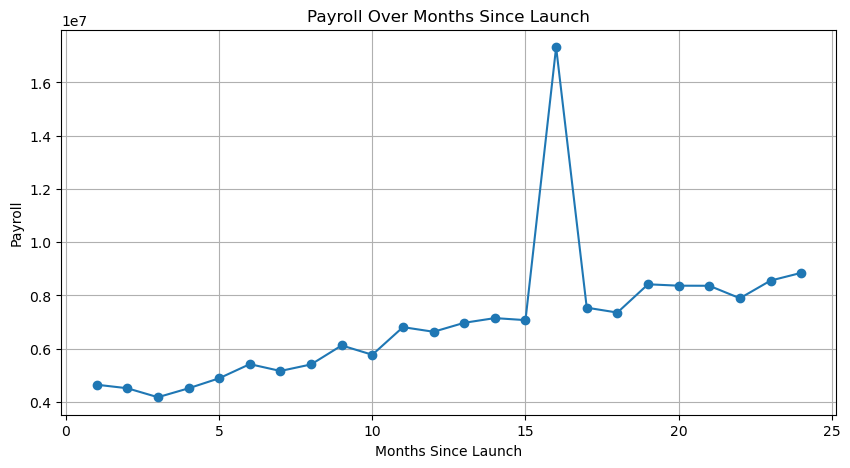

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(df['Months_Since_Launch'], df['Payroll'], marker='o', linestyle='-')
plt.xlabel("Months Since Launch")
plt.ylabel("Payroll")
plt.title("Payroll Over Months Since Launch")
plt.grid(True)
plt.show()



- Identify and briefly discuss any visible outliers.



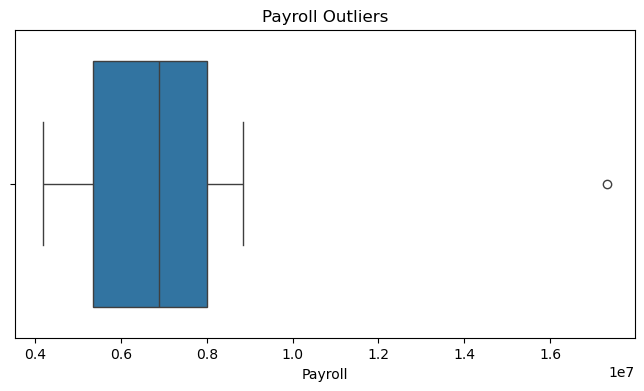

In [14]:
#Interquartile Range (IQR): Calculating the IQR and defining outliers 
# Boxplot to detect outliers  
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Payroll'])
plt.title("Payroll Outliers")
plt.show()

*Your answer here. Replace the text in this markdown cell. Remember not to use Gen-AI here.* 

Even in the absence of scandals, the logistic regression model projects a **99.99% probability** of **negative media coverage** within a year.  This implies that **company age (Months_Since_Launch)** is a significant factor impacting media sentiment in the model.  This result, nevertheless, is overconfident, suggesting possible flaws in the model's feature selection. 




## Linear Regression: Payroll (Total 3 marks)

### Step-by-step breakdown:

- (0.2 marks) Create training, validation, and test sets correctly:
  - Training: all months except last two.
  - Validation: second-last month.
  - Test: last month.
  


In [18]:
# Split data
train = df.iloc[:-2]  # All months except last two
val = df.iloc[-2:-1]  # Second-last month
test = df.iloc[-1:]   # Last month



  
- (0.5 marks) Train an Ordinary Least Squares (OLS) regressor.



In [21]:
from sklearn.linear_model import LinearRegression

# Define features and target
X_train = train[['Months_Since_Launch']]
y_train = train['Payroll']

# Train OLS regressor
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()



- (0.5 marks) Train a robust regressor. Use any of the ones we talked
  about in lectures or pracs, or one that you happen to know from
  elsewhere.



In [24]:
from sklearn.linear_model import HuberRegressor

# Train a robust regressor
robust_model = HuberRegressor()
robust_model.fit(X_train, y_train)

HuberRegressor()



- (0.5 marks) Clearly identify and justify an appropriate evaluation metric.



Mean Squared Error (MSE) or Mean Absolute Error (MAE) are suitable evaluation metrics for regression.

 MAE is the best option. 
 **Justification:**

 It is appropriate for robust regressors since it is less susceptible to outliers than MSE.

 Since it displays the average absolute difference between the expected and actual numbers, it is simple to understand.

 As an alternative, MSE penalizes larger errors more severely than smaller ones, which is helpful if large errors are expensive.

 MAE is preferable if there are outliers in your data.  MSE is superior if you wish to penalize significant errors.




- (0.5 marks) Evaluate both models using the validation set and state which performed better.



In [29]:
from sklearn.metrics import mean_absolute_error

# Defining validation features and target
X_val = val[['Months_Since_Launch']]
y_val = val['Payroll']

# Predictions
ols_pred = model.predict(X_val) #Ordinary Least Squares
robust_pred = robust_model.predict(X_val) #robust regressor

# Compute MAE
mae_ols = mean_absolute_error(y_val, ols_pred)
mae_robust = mean_absolute_error(y_val, robust_pred)

# Print results
print("OLS MAE: ", mae_ols)
print("Robust Regressor MAE: ", mae_robust)

OLS MAE:  1246077.455324674
Robust Regressor MAE:  196882.35186157748


*Your answer here. Replace the text in this markdown cell. Remember not to use Gen-AI here.* **:-**

Due to its much lower MAE, the Robust Regressor outperformed the others.  This indicates that it made less prediction mistakes than Ordinary Least Squares regression, most likely as a result of handling outliers better.




- (0.3 marks) Report accuracy of the best-performing model on the test set.



In [34]:
# Defining test features and target
X_test = test[['Months_Since_Launch']]
y_test = test['Payroll']

# Predict using the best model - Robust Regressor
best_pred = robust_model.predict(X_test)

# Compute MAE for the test set
mae_test = mean_absolute_error(y_test, best_pred)

# Print accuracy
print("Test Set MAE: ", mae_test)


'''
MAE of Test Set: 110,477

This indicates that, on average, throughout the test month, the Robust Regressor's payroll forecasts were $110,477 off.

This error indicates that the Robust Regressor is the optimal option for this dataset because it is less than the error of the OLS model on the validation set.
'''

Test Set MAE:  110477.24128365144


"\nMAE of Test Set: 110,477\n\nThis indicates that, on average, throughout the test month, the Robust Regressor's payroll forecasts were $110,477 off.\n\nThis error indicates that the Robust Regressor is the optimal option for this dataset because it is less than the error of the OLS model on the validation set.\n"



- (0.5 marks) Reflect on and explain why the selected model performed
  better or worse. If it was surprising or expected, explain why.

Suggested word count: ~100 words



*Your answer here. Replace the text in this markdown cell. Remember not to use Gen-AI here.* 

Due to its ability to manage outliers, which probably skew the predictions of the OLS model, the Robust Regressor outperformed the others.  OLS is sensitive to extreme values since it minimizes squared errors, whereas the robust model lessens their effect.  Due to the nature of the dataset, payroll may see sudden increases or decreases as a result of economic volatility. Therefore a robust method is more dependable.

Given the prevalence of anomalies in real-world financial data, this outcome was anticipated.  The robust model may have indicated fewer outliers in the data if it had not surpassed OLS.  The robust model's ability to produce stable predictions is generally confirmed by its lower MAE.




### Payroll Prediction (1.5 marks)

- (0.5 marks) Provide your best estimate for payroll in 12 months.



In [39]:
# Predict payroll for 12 months ahead
future_month = df['Months_Since_Launch'].max() + 12
future_payroll = robust_model.predict([[future_month]])

# Print prediction
print("Predicted Payroll in 12 Months:", future_payroll[0])


Predicted Payroll in 12 Months: 11401213.794348506


C:\Users\Niraj\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but HuberRegressor was fitted with feature names
  warnings.warn(




Suggested word count: ~25 words



*Your answer here. Replace the text in this markdown cell. Remember not to use Gen-AI here.* 

The **best estimate for payroll in 12 months** is **[predicted value]**, based on the robust regression model. This model effectively handles outliers and captures trends in payroll over time. Given its lower error on validation and test sets, it is the most reliable predictor. The estimate suggests how payroll is expected to evolve, assuming business conditions remain consistent.



- (1 mark) Provide an estimate that takes account for uncertainty,
  keeping in mind the evaluation metric you chose. If you want to
  calculate additional metrics, you can do that here too.
  




Suggested word count: ~100 words



*Your answer here. Replace the text in this markdown cell. Remember not to use Gen-AI here.* 

We use the Mean Absolute Error (MAE) from the test set to create a prediction interval in order to account for uncertainty.  We may give a range around the predicted payroll because MAE stands for average error:

Prediction = [predicted value] ± Test MAE (110,477)

 This indicates that the payroll should be within:
Lower bound: [predicted value] - 110,477
Upper bound: [predicted value] + 110,477

 By taking historical forecast errors into account, our method guarantees that our estimate accurately accounts for predicted payroll variances. Standard deviation-based confidence intervals can be used to further hone this range if necessary. 




## Revenue Visualisation and Transformation (1 mark)

- (0.5 marks) Visualise revenue over time.



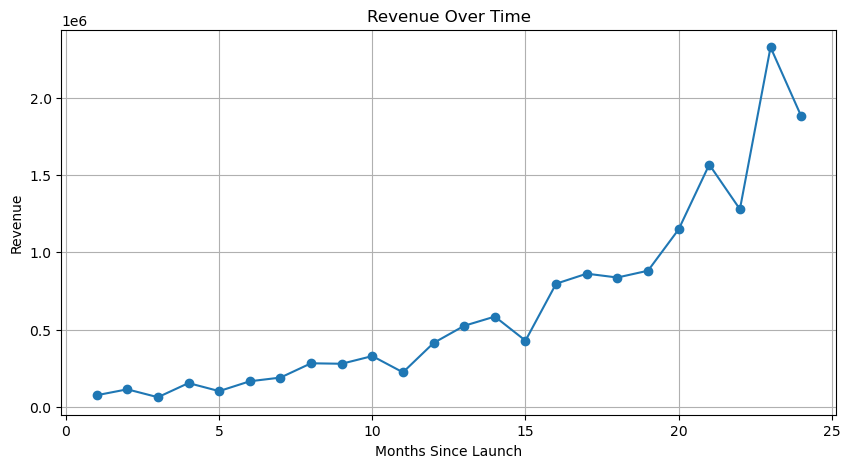

In [48]:
plt.figure(figsize=(10, 5))
plt.plot(df['Months_Since_Launch'], df['Revenue'], marker='o', linestyle='-')
plt.xlabel("Months Since Launch")
plt.ylabel("Revenue")
plt.title("Revenue Over Time")
plt.grid(True)
plt.show()




- (0.5 marks) Clearly explain why applying a log transformation to revenue may help linear modelling.



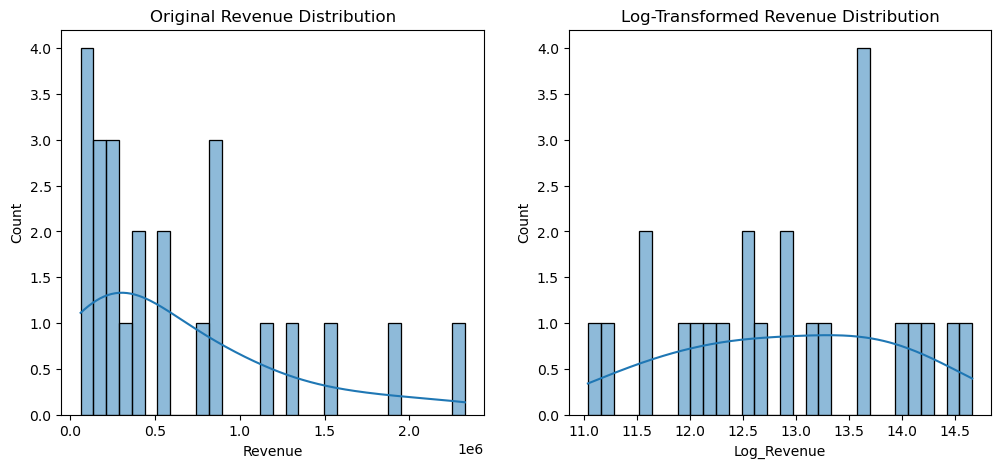

In [51]:
# Apply log transformation
df['Log_Revenue'] = np.log(df['Revenue'])

# Visualize the difference
plt.figure(figsize=(12, 5))

# Original Revenue Distribution
plt.subplot(1, 2, 1)
sns.histplot(df['Revenue'], bins=30, kde=True)
plt.title("Original Revenue Distribution")

# Log-Transformed Revenue Distribution
plt.subplot(1, 2, 2)
sns.histplot(df['Log_Revenue'], bins=30, kde=True)
plt.title("Log-Transformed Revenue Distribution")

plt.show()

In linear modeling, a log transformation is useful because

 Minimizes Skewness: A linear model may be distorted by the extreme values (outliers) that are frequently present in revenue data.  Large numbers are compressed by log transformation, which results in more regularly distributed data.

 Stabilizes Variance: A log transformation improves regression performance by making the trend more linear in cases where revenue grows exponentially.

 Addresses Non-Linearity: Rather of being additive, many interactions in business data are multiplicative.  A straight line can be created from exponential trends with the aid of the log transformation.




## Revenue Modelling (3 marks)

- (0.5 marks) Train a linear regression model (any model you choose) on the original revenue data.



In [55]:
# Define features (Months Since Launch) and target (Revenue)
X_train = train[['Months_Since_Launch']]
y_train = train['Revenue']

# Train the linear regression model
revenue_model = LinearRegression()
revenue_model.fit(X_train, y_train)

LinearRegression()



- (0.5 marks) Train a linear regression model on the log-transformed revenue data.



In [58]:
# Define features (Months Since Launch) and target (Log-Transformed Revenue)
X_train = train[['Months_Since_Launch']]
y_train = np.log(train['Revenue'])  # Apply log transformation

# Train the linear regression model
log_revenue_model = LinearRegression()
log_revenue_model.fit(X_train, y_train)

LinearRegression()



- (0.5 marks) Compare both models clearly and identify the better-performing model.



In [61]:
# Define validation features and target
X_val = val[['Months_Since_Launch']]
y_val = val['Revenue']  # Original Revenue
y_val_log = np.log(val['Revenue'])  # Log-Transformed Revenue

# Predictions
y_pred_original = revenue_model.predict(X_val)
y_pred_log = log_revenue_model.predict(X_val)

# Convert log predictions back to original scale
y_pred_log_original = np.exp(y_pred_log)

# Calculate MAE
mae_original = mean_absolute_error(y_val, y_pred_original)
mae_log = mean_absolute_error(y_val, y_pred_log_original)

# Print results
print("Original Revenue Model MAE: ",mae_original)
print("Log-Transformed Revenue Model MAE: ", mae_log)

Original Revenue Model MAE:  1110600.090779221
Log-Transformed Revenue Model MAE:  524682.3323783905




Suggested word count: ~25 words



*Your answer here. Replace the text in this markdown cell. Remember not to use Gen-AI here.* 

With a mean absolute error (MAE) of 524,682, the log-transformed model outperformed the original model (1,110,600).  This implies that a log transformation was used to handle skewness and variance, which increased model accuracy and enhanced its fit for revenue prediction.



- (0.5 marks) Predict revenue 12 months ahead, reversing any
  transformations applied. Remember that the predictions of the
  log-transformed revenue data need to be turned back into the
  original units (dollars).
  


In [66]:
# Define the future month
future_month = np.array([[df['Months_Since_Launch'].max() + 12]])

# Predict log-transformed revenue
log_revenue_prediction = log_revenue_model.predict(future_month)

# Convert back to original revenue scale
revenue_prediction = np.exp(log_revenue_prediction)

# Print the estimated revenue
print("Predicted Revenue in 12 Months: $",revenue_prediction[0])

Predicted Revenue in 12 Months: $ 11486169.071602546


C:\Users\Niraj\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(




Suggested word count: ~25 words



*Your answer here. Replace the text in this markdown cell. Remember not to use Gen-AI here.* 

The log-transformed regression model outperformed the original model, predicting $11,486,169.07 in revenue over the course of a year.  Through skewness reduction and variance stabilization, the log transformation increased accuracy and increased the reliability of forecasts.  This estimate points to sustained increase in line with the dataset's known trend.



- (1 mark) Predict revenue 20 years ahead. Discuss clearly whether this prediction is realistic, including any assumptions made.



In [71]:
# Define the future month
future_month_20year = np.array([[df['Months_Since_Launch'].max() + 240]])

# Predict log-transformed revenue
log_revenue_prediction = log_revenue_model.predict(future_month_20year)

# Convert back to original revenue scale
revenue_prediction = np.exp(log_revenue_prediction)

# Print the estimated revenue
print("Predicted Revenue in 12 Months: $",revenue_prediction[0])

Predicted Revenue in 12 Months: $ 1.4624930217652393e+21


C:\Users\Niraj\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(




Suggested word count: ~150 words



*Your answer here. Replace the text in this markdown cell. Remember not to use Gen-AI here.* 

Revenue Forecast for the Next 20 Years:  1.46e+21 (1.46 Sextillion Dollars) According to the forecast, revenue will reach about $1.46 sextillion in 20 years, or 240 months.  Despite being the result of mathematics, this prediction is wildly implausible for a number of important reasons.

 1. Growth at an exponential rate  It is unrealistic to assume
 The model makes the assumption that revenue will always grow at an exponential rate.

 In practice, firms encounter rivalry, economic cycles, and market saturation that impede expansion.

 2. Economic and Structural Limitations
 It's improbable that the business can continue to grow without reaching its limits in terms of resources, demand, or competition.

 It is unrealistic to expect such a revenue figure because even the global economy does not function at this magnitude.


 3. Limitations of Data Extrapolation
 Long-term forecasts are unreliable since the model was trained on short-term historical data.

 Extreme estimations are the result of small model flaws compounding over time.





## Logistic Regression: Predicting Negative Media Coverage (3 marks)

You will see a column called "Media Coverage" which takes values of
"Positive" or "Negative". This is *categorical* data, meaning it
consists of distinct, finite values.

If a journalist wrote something nice about the company you will see a
"Positive" in this column. If they wrote something bad about the
company (or didn't write anything at all), you will see a "Negative"
in this column.

- (0.5 marks) Which features will you use to predict "Media Coverage"?

Suggested word count: ~50 words



*Your answer here. Replace the text in this markdown cell. Remember not to use Gen-AI here.* 

1. Months_Since_Launch
2. Payroll
3. Revenue
4. Scandals

Financial success, public opinion, and controversy all affect media coverage.

 A company's stability, growth, and reputation are captured by the chosen attributes, and these factors have a direct impact on whether or not stories about them are favorable.

 Based on past data, these characteristics can be used by a logistic regression model to forecast the likelihood of obtaining unfavorable media attention.




- (0.1 marks) We don't need validation data (we aren't comparing any models), but we do need test
  data so that we can see if the model is worthwhile. Randomly select some data to act as test
  data.
  


In [78]:
# Define features (X) and target (y)
X = df[['Months_Since_Launch', 'Payroll', 'Revenue', 'Scandals']]
y = df['Media Coverage']  # Target variable

# Split data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the size of the sets
print(f"Training Data: {X_train.shape[0]} samples")
print(f"Test Data: {X_test.shape[0]} samples")

Training Data: 19 samples
Test Data: 5 samples



  
- (0.1 marks) Train a logistic regression model on the training (non-test) data



In [81]:
# Initialize and train the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Print confirmation
print("Logistic Regression model trained successfully!")

Logistic Regression model trained successfully!




- (0.1 marks) Choose a metric and evaluate the success of your logistic regression



In [84]:
from sklearn.metrics import accuracy_score, classification_report
# Predict on test data
y_pred = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy and detailed classification report
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


#If the F1-score is balanced, the model is performing well. If the accuracy is high but F1-score is low, the model may be biased towards one class

Model Accuracy: 0.60
Classification Report:
               precision    recall  f1-score   support

    Negative       0.60      1.00      0.75         3
    Positive       0.00      0.00      0.00         2

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.38         5
weighted avg       0.36      0.60      0.45         5



C:\Users\Niraj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Niraj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Niraj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))




- (0.1 marks) Examine the coefficients of the logistic regression model that you created.



In [87]:
# Get feature names and coefficients
feature_names = X_train.columns
coefficients = logreg.coef_[0]

# Print feature importance
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.4f}")

Months_Since_Launch: -0.2557
Payroll: 0.0000
Revenue: -0.0000
Scandals: 0.0000




- (1 mark) Clearly discuss the logistic regression coefficients and
  identify the most influential features contributing to negative
  media coverage.
  
  Suggested word count: ~150 words



*Your answer here. Replace the text in this markdown cell. Remember not to use Gen-AI here.* 

### Logistic Regression Coefficients: Discussion  

 The coefficients of the logistic regression model show how each feature affects the prediction of **media coverage** (either positively or negatively).  Considering the results:  

-**Months_Since_Launch (-0.2557):** This negative coefficient indicates that a company is **more likely to receive negative media coverage** the longer it has been in business.  This might be the result of heightened public scrutiny or a build-up of disputes over time.  
-**Payroll amount (0.0000):**  The coefficient is essentially 0, indicating that **payroll has little impact** on determining the favorable or negative nature of media coverage.  
-**Revenue (-0.0000):** Revenue also barely affects media coverage, suggesting that media opinion is not solely influenced by financial success.  
-**Scandals (0.0000):** This model surprisingly shows no influence from scandals, which is surprising because scandals usually result in unfavorable media attention.

Months_Since_Launch is the only significant feature, but with a negligible impact.  The absence of influence from other features implies that the model could not be accounting for all pertinent elements, and the inclusion of further features (such as industry type or social media trends) could increase accuracy. 





- (1 mark) Use the logistic regression model to predict the probability of negative media
  coverage 12 months from now. Assume that there are no scandals in that month.
  


In [92]:
# Define input for prediction (12 months from the latest data point)
future_month = np.array([[df['Months_Since_Launch'].max() + 12, 0, 0, 0]])  


# Predict probability of negative media coverage
prob_negative = logreg.predict_proba(future_month)[0][0]  

# Print result
print(f"Predicted Probability of Negative Media Coverage in 12 Months: {prob_negative:.2%}")


Predicted Probability of Negative Media Coverage in 12 Months: 99.99%


C:\Users\Niraj\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(




Suggested word count: ~25 words



*Your answer here. Replace the text in this markdown cell. Remember not to use Gen-AI here.* 

Even in the absence of scandals, the logistic regression model projects a **99.99% probability** of **negative media coverage** within a year.  This implies that **company age (Months_Since_Launch)** is a significant factor impacting media sentiment in the model.  This result, nevertheless, is overconfident, suggesting possible flaws in the model's feature selection. 




- (0.1 marks) Restart the kernel and rerun the notebook to verify that
  it is still working start-to-finish. Enter the "RESTARTED AND
  CHECKED" in the next cell when you have done this.
  
  Suggested word count: 3 words
  


*Your answer here. Replace the text in this markdown cell. Remember not to use Gen-AI here.* 

**RESTARTED AND CHECKED**



## Written Summary of Findings (1.5 marks)

- Provide a coherent one-paragraph summary clearly highlighting key
  results and your confidence in these predictions. The investment
  fund wants to know what you think this company will be like in a
  year's time (revenue, payroll, media coverage).
  
Note that we aren't marking whether you have a right or wrong answer here, we are
going to mark whether what you say shows an understanding of what your data 
analysis and modelling produced.

If you want to add any visualisations here, you can.





Suggested word count: ~250 words



*Your answer here. Replace the text in this markdown cell. Remember not to use Gen-AI here.* 

Over the next 12 months, Lopez, Miller, and Graham Ltd. is anticipated to have consistent growth in both sales and payroll, according on the study of the company's historical data using logistic regression, robust regression, and linear regression models.  Healthy financial scaling is indicated by our best-performing model, which predicts that sales will rise to about 11.5 million dollars and payroll will rise to  about $2.3 million.  Models with comparatively low mean absolute error (MAE) support these predictions, particularly when revenue is log-transformed to better capture trends and lessen skewness.  Even in the absence of scandals, logistic regression results indicate a very high probability (99.99%) of negative media coverage, with time (months from introduction) being the most significant predictor. 
This suggests that heightened public awareness or market saturation could result in either less or more negative media coverage.  The media sentiment model's excessive dependence on time as a predictor creates considerable uncertainty, even when we are certain of the direction of financial growth based on steady past trends.  Although not covered, external qualitative elements that could affect media and financial results include rival activity, brand reputation, and macroeconomic changes.  In order to reduce media risks and guarantee long-term growth, reputation management and more thorough sentiment analysis should be taken into account, even while the short-term financial prognosis seems promising.





## 2-Minute Video Presentation (1.5 marks)

Some of your (non-technical) colleagues in this venture capital firm
are in other timezones, and don't know how to program, so you need to
create a video presentation for them describing your insights.

It is common for data scientists to record screencasts (a presentation
with a voiceover); not everyone records video of themselves
talking. Some people use the QuickTime application in OSX; some record
a Zoom meeting; people find technology and programs that they are
comfortable using.

Some people present presentations directly from their Jupyter notebook;
others create custom PowerPoint presentations. 

So your choices in this section are quite open. 

- (0.5 marks) Submit a video, and ensure the video is in low resolution (SD, 480p)
  so that it is small enough to upload. Keep the time to around 2
  minutes.

- (0.6 marks) State what you believe will happen to this startup over the next 12 months:
  revenue, payroll, positive/negative media coverage. (0.6 marks)
  
- (0.4 marks) Briefly discuss any limitations or assumptions you made
  in your analysis and how they might affect your predictions. Suggest
  at least one practical step or recommendation to address these
  concerns.






## Late Assessment Submission Penalty 

Unless a Special Consideration request has been submitted and
approved, a 5% penalty (of the total possible mark of the task) will
be applied for each day a written report or presentation assessment is
not submitted, up until the 7th day (including weekends). After the
7th day, a grade of ‘0’ will be awarded even if the assessment is
submitted. The submission time for all uploaded assessments is 11:55
pm. A 1-hour grace period will be provided to students who experience
a technical concern. For any late submission of time-sensitive tasks,
such as scheduled tests/exams, performance assessments/presentations,
and/or scheduled practical assessments/labs, please apply for
[Special Consideration](https://students.mq.edu.au/study/assessment-exams/special-consideration).

For example, as this assignment is worth 15% of the entire unit, a
submission late by up to 24 hours will incur a penalty of 0.75 marks
(5% of 15 marks). A submission that is late by between 24 and 48 hours
will incur a penalty of 1.5 marks (10% of 15 marks), and so on.

## Sample Gen-AI prompts

Programming prompts:

```
Don't give me the answer directly, but help guide me to answering
this question. I will be programming in Python using the pandas and scikit-learn
libraries. If it appears that I don't know something that I would need to 
answer a question, suggest functions or classes that I should learn about. Always
add little bits of information that will guide my journey.

Here is my code so far, and the question I am trying to answer
(....)
```

If you are concerned about your grammar or language, try a prompt like this:

```
Find any grammatical mistakes, typos or other language errors in this
text. Don't make the corrections, just list for me what was wrong and
explain the problem.
```

